In [85]:
#import pacakges
import numpy as np
import pandas as pd

In [86]:
#read data
data=pd.read_csv('bank.csv')

# Basic check

In [87]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,NaN,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [88]:
data.shape

(11163, 17)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11163 non-null  int64 
 1   job        11163 non-null  object
 2   marital    11163 non-null  object
 3   education  11163 non-null  object
 4   fault      11163 non-null  object
 5   balance    11163 non-null  int64 
 6   housing    11163 non-null  object
 7   loan       11163 non-null  object
 8   contact    11163 non-null  object
 9   day        11163 non-null  int64 
 10  month      11163 non-null  object
 11  duration   11163 non-null  int64 
 12  campaign   11163 non-null  int64 
 13  pdays      11163 non-null  int64 
 14  previous   11163 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11163 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [90]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,41.233539,1528.611484,15.657081,372.053839,2.508286,51.325719,0.832482
std,11.914022,3225.278053,8.420967,347.170757,2.721993,108.754538,2.291918
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.500000,22.000000,496.000000,3.000000,20.500000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [91]:
#check for duplicates
#duplicateRows=data[data.duplicated(keep='last')]

In [92]:
#data=data.drop_duplicates(keep='last',inplace=True)

In [93]:
# null value check
data.isnull().sum()

age          0
job          0
marital      0
education    0
fault        0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64

In [94]:
len(data.index)

11163

In [95]:
# null value check
round(100*data.isna().sum()/len(data.index),2)

age          0.00
job          0.00
marital      0.00
education    0.00
fault        0.00
balance      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.00
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.01
deposit      0.00
dtype: float64

In [96]:
# drop null value
data.dropna(subset=['poutcome'],inplace=True)

In [97]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Outlier Detection

In [98]:
numerics=['int64']
outlier_chk_features=data.select_dtypes(include=numerics)

In [99]:
data.describe(percentiles=[.25,.50,.80,.90])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.232216,1528.744401,15.658036,371.955743,2.508421,51.330407,0.832557
std,11.913736,3225.391964,8.420740,347.031562,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.250000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
80%,52.000000,2223.000000,24.000000,585.000000,3.000000,95.000000,1.000000
90%,58.000000,3897.600000,28.000000,838.000000,5.000000,191.000000,3.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Examine categorical data

In [100]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


### Assignment4 : Optimized the above code

In [102]:
# examine unique values
objcol=['job','marital','education','housing']
for col in objcol:
    print(col, '\n' ,data[col].unique())


job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
housing 
 ['yes' 'no']


In [103]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [104]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [105]:
data.corr(numeric_only= True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112382,-0.000791,0.000097,-0.005290,0.002763,0.020160
balance,0.112382,1.000000,0.010387,0.022616,-0.013929,0.017381,0.030782
day,-0.000791,0.010387,1.000000,-0.018378,0.137007,-0.077232,-0.058981
duration,0.000097,0.022616,-0.018378,1.000000,-0.041508,-0.027346,-0.026684
campaign,-0.005290,-0.013929,0.137007,-0.041508,1.000000,-0.102726,-0.049699
pdays,0.002763,0.017381,-0.077232,-0.027346,-0.102726,1.000000,0.507272
previous,0.020160,0.030782,-0.058981,-0.026684,-0.049699,0.507272,1.000000


# Data Visulazation

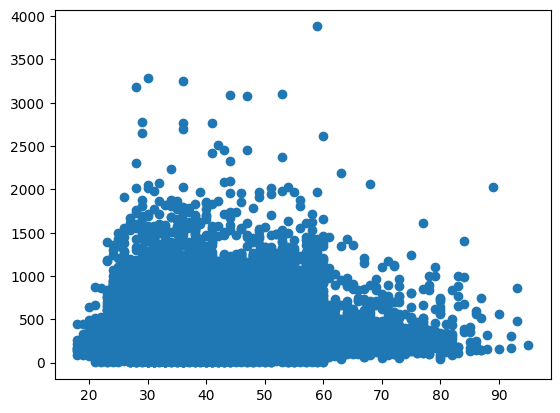

In [106]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data['age'],data['duration'])

<Axes: >

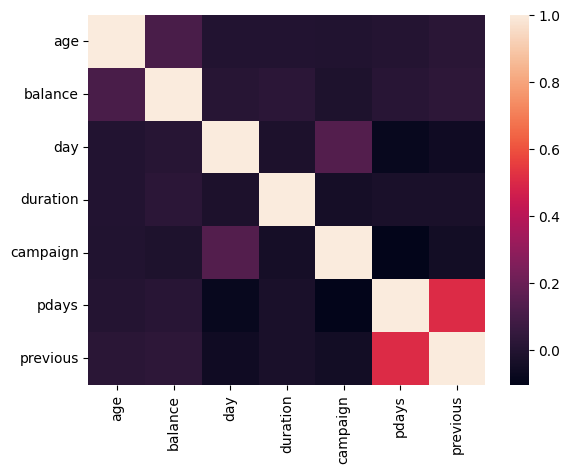

In [107]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

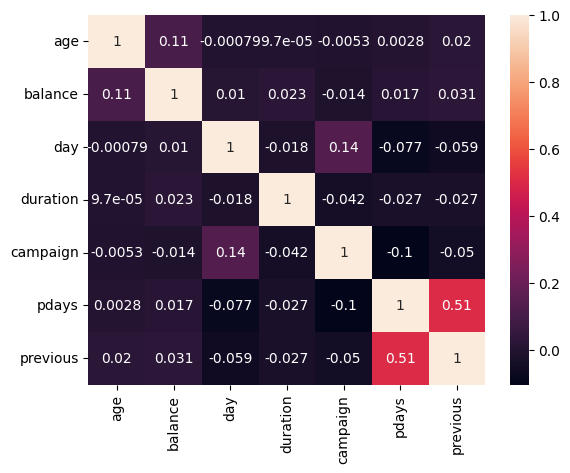

In [108]:
# heatmap with values
sns.heatmap(data.corr(numeric_only=True), annot=True) 

Text(0.5, 1.0, 'Bar chart for Contact and Deposite')

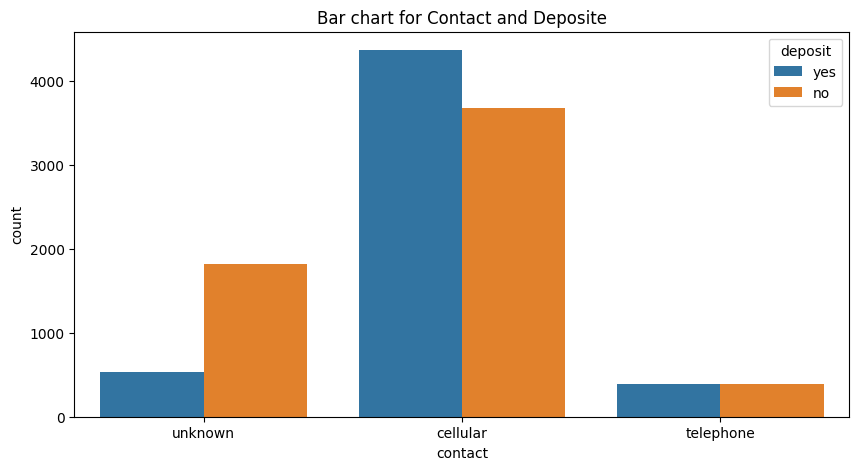

In [109]:
# bar chart
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='deposit',data=data)
plt.title('Bar chart for Contact and Deposite')

# feature enginerring

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [111]:
object_col = data.select_dtypes(include=['object']).columns.tolist()
for i in object_col:
    print(i, '\n' ,data[i].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
fault 
 ['no' 'yes']
housing 
 ['yes' 'no']
loan 
 ['no' 'yes']
contact 
 ['unknown' 'cellular' 'telephone']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 
 ['unknown' 'other' 'failure' 'success']
deposit 
 ['yes' 'no']


In [112]:
# convert binary category to numbers
data['fault'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_19084\472422960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fault'].replace(['yes','no'],[1,0],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_19084\472422960.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fault'].replace(['yes

In [113]:
for col in ['fault','housing','loan','deposit']:
    data[col].replace(['yes','no'],[1,0],inplace=True)

In [114]:
data.sample(10)

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4185,71,retired,married,tertiary,0,653,0,0,telephone,3,sep,471,1,189,1,success,1
125,33,blue-collar,married,secondary,0,0,1,0,unknown,21,may,521,3,-1,0,unknown,1
10864,34,blue-collar,single,secondary,0,2764,1,0,cellular,13,may,158,1,357,1,failure,0
882,46,technician,divorced,secondary,0,-90,0,1,telephone,17,oct,270,1,-1,0,unknown,1
5689,47,unknown,married,unknown,0,1880,0,0,unknown,18,jun,64,2,-1,0,unknown,0
9392,34,technician,married,secondary,0,2019,1,1,unknown,27,jun,102,1,-1,0,unknown,0
4930,68,retired,divorced,primary,0,2027,0,0,cellular,14,sep,404,2,91,4,success,1
2808,27,blue-collar,single,secondary,0,3792,0,0,cellular,22,oct,504,1,183,2,success,1
8910,31,technician,single,secondary,0,816,0,0,cellular,9,jun,100,2,-1,0,unknown,0
6497,32,admin.,single,secondary,0,45,1,1,cellular,14,may,908,3,344,7,other,0


In [115]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [116]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])

In [117]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
3,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
4,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
5,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
X=data.drop(columns='deposit')
Y=data['deposit']

In [119]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_min_max=pd.DataFrame(min_max.fit_transform(X),columns=X.columns)

In [120]:
X_min_max.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0
1,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.0,0.0,1.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.0,0.0,1.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.0,0.0,1.0


## Train Test Split

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [122]:
X_train.shape

(7813, 16)

In [123]:
X_test.shape

(3349, 16)

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [125]:
lr.fit(X_train,Y_train)

c:\Users\PC\Desktop\Bank_Loan_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [126]:
# make the prediction
y_pred=lr.predict(X_test)

In [127]:
print(y_pred)

[0 0 1 ... 0 1 1]


In [128]:
print(Y_test.values)

[0 1 1 ... 0 1 1]


In [129]:
lr.score(X_test,Y_test)

0.7670946551209317

In [130]:
# Accuracy check
from sklearn.metrics import accuracy_score,confusion_matrix
Logistic_Regression_accuracy_score = accuracy_score(y_pred,Y_test)*100
Logistic_Regression_accuracy_score

76.70946551209316

In [131]:
confusion_matrix(y_pred,Y_test)

array([[1441,  438],
       [ 342, 1128]])

In [132]:
X_test.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5443,51,7,1,3,0,3413,0,0,0,27,1,146,7,-1,0,3
1561,50,6,0,2,0,13,1,0,0,20,0,76,1,-1,0,3
2343,64,5,1,1,0,5966,1,0,0,22,6,983,1,-1,0,3
9491,49,1,1,1,0,134,1,1,2,27,8,265,2,-1,0,3
5289,31,0,2,1,0,131,1,0,0,15,6,151,1,-1,0,3


In [133]:
#X_test['y_actual']=Y_test.values
#X_test['y_pred']=y_pred

In [134]:
#X_test.to_csv('X_test1.csv')

In [135]:
#X_test.shape

## KNN classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [137]:
knn.fit(X_train,Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [138]:
y_pred=knn.predict(X_test)

In [139]:
KNN_accuracy_score = accuracy_score(y_pred,Y_test)*100
KNN_accuracy_score

74.41027172290235

In [140]:
confusion_matrix(y_pred,Y_test)

array([[1378,  452],
       [ 405, 1114]])

## Support vector machine

In [141]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [142]:
svm.fit(X_train,Y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [143]:
y_pred=svm.predict(X_test)

In [144]:
SVN_accuracy_score = accuracy_score(y_pred,Y_test)*100
SVN_accuracy_score

51.83636906539265

In [145]:
confusion_matrix(y_pred,Y_test)

array([[954, 784],
       [829, 782]])

## Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy')

In [147]:
Classifier.fit(X_train,Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.43271464701495427, 0.9833333333333333, 'x[11] <= 202.5\nentropy = 0.998\nsamples = 7813\nvalue = [4090, 3723]'),
 Text(0.13340164579459166, 0.95, 'x[11] <= 88.5\nentropy = 0.731\nsamples = 3107\nvalue = [2471, 636]'),
 Text(0.28305814640477295, 0.9666666666666666, 'True  '),
 Text(0.01696885169688517, 0.9166666666666666, 'x[11] <= 62.5\nentropy = 0.263\nsamples = 988\nvalue = [944, 44]'),
 Text(0.007438400743840074, 0.8833333333333333, 'x[12] <= 1.5\nentropy = 0.11\nsamples = 545\nvalue = [537, 8]'),
 Text(0.004958933829226716, 0.85, 'x[8] <= 0.5\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.003719200371920037, 0.8166666666666667, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(0.006198667286533396, 0.8166666666666667, 'x[10] <= 5.5\nentropy = 0.374\nsamples = 97\nvalue = [90.0, 7.0]'),
 Text(0.003719200371920037, 0.7833333333333333, 'x[7] <= 0.5\nentropy = 0.755\nsamples = 23\nvalue = [18, 5]'),
 Text(0.002479466914613358, 0.75, 'x[10] <= 4.5\nentropy = 0

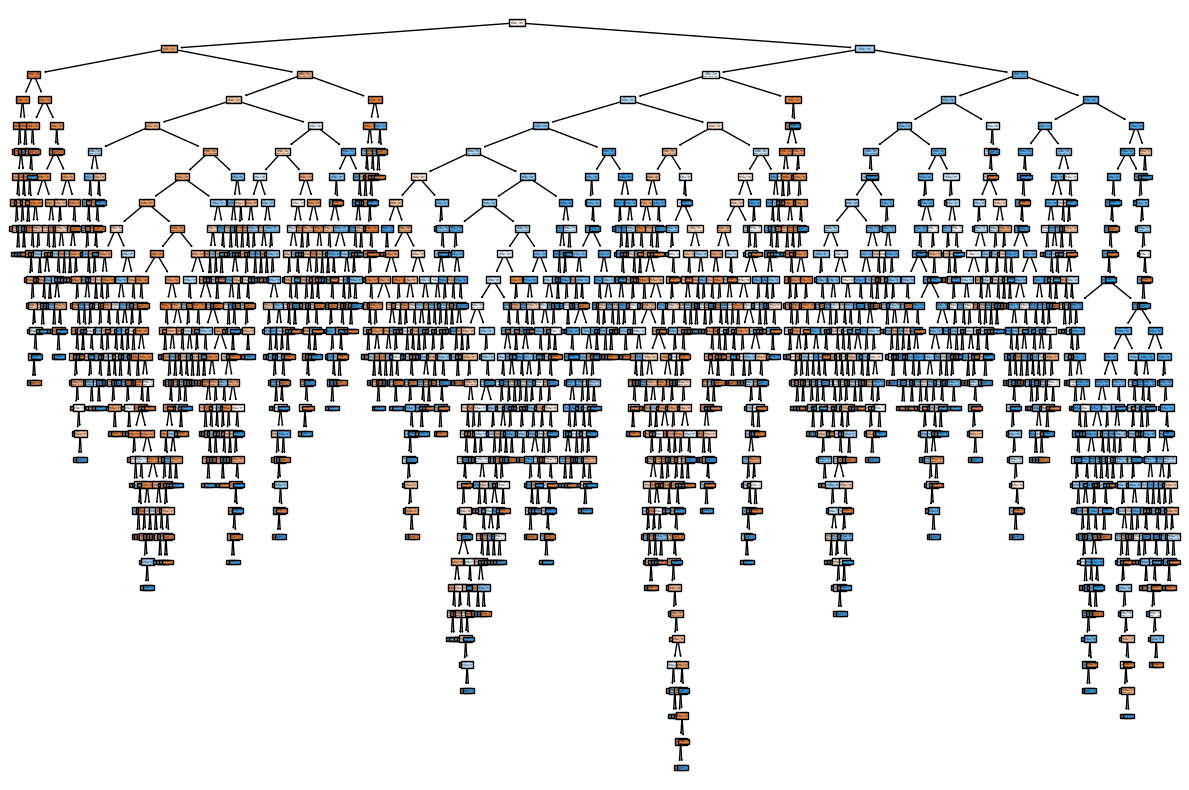

In [148]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)

In [149]:
y_pred=Classifier.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Decision_Tree_accuracy_score = accuracy_score(y_pred,Y_test)*100
Decision_Tree_accuracy_score

77.48581666169005

In [151]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1761
           1       0.77      0.76      0.76      1588

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [152]:
confusion_matrix(y_pred,Y_test)

array([[1395,  366],
       [ 388, 1200]])

## Naiv Bayes Classfier

In [153]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [154]:
classifier.fit(X_train,Y_train)

,priors,None
,var_smoothing,1e-09


In [155]:
y_pred  =  classifier.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
NV_accuracy_score = accuracy_score(y_pred,Y_test)
NV_accuracy_score

0.7438041206330248

In [157]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1601
           1       0.78      0.70      0.74      1748

    accuracy                           0.74      3349
   macro avg       0.75      0.75      0.74      3349
weighted avg       0.75      0.74      0.74      3349



In [158]:
confusion_matrix(y_pred,Y_test)

array([[1263,  338],
       [ 520, 1228]])

## Random forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [160]:
rfc=rfc.fit(X_train,Y_train)

In [161]:
y_pred  =  rfc.predict(X_test)

In [162]:
Random_forest_score = accuracy_score(y_pred,Y_test)*100
Random_forest_score

85.18960883845924

In [163]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [164]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1625
           1       0.89      0.81      0.85      1724

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.86      0.85      0.85      3349



In [165]:
confusion_matrix(y_pred,Y_test)

array([[1456,  169],
       [ 327, 1397]])

In [166]:
print("Logistic Regression Accuracy:",Logistic_Regression_accuracy_score)
print("KNN Accuracy:",KNN_accuracy_score)
print("SVM Accuracy:",SVN_accuracy_score)
print("Decision Tree Accuracy:",Decision_Tree_accuracy_score)
print("Random Forest Accuracy:",Random_forest_score)

Logistic Regression Accuracy: 76.70946551209316
KNN Accuracy: 74.41027172290235
SVM Accuracy: 51.83636906539265
Decision Tree Accuracy: 77.48581666169005
Random Forest Accuracy: 85.18960883845924


 # **so we save the model with Randam Forest Because it gives high accuracy score**

In [167]:
from joblib import dump
dump(rfc, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [168]:
import sklearn
print(sklearn.__version__)


1.7.2
